In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
df=pd.read_csv("/home/saumitra/Desktop/kaggle/CompleteDataset.csv")
import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

In [2]:
footballers.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


We'll start with the **scatter plot**. Supose that we are interested in seeing which type of offensive players tends 
to get paid the most: the striker, the right-winger, or the left-winger.

The new variable in this chart is **color**. Color provides an aesthetically pleasing visual, but it's tricky to 
use. Looking at this scatter plot we see the same overplotting issue we saw in previous sections. But we no longer 
have an easy solution, like using a hex plot, because color doesn't make sense in that setting.

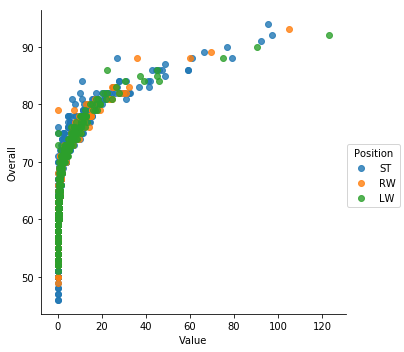

In [3]:
sns.lmplot(x='Value',y='Overall',hue='Position',data=footballers[footballers.Position.isin(['RW','LW','ST'])]
          ,fit_reg=False)

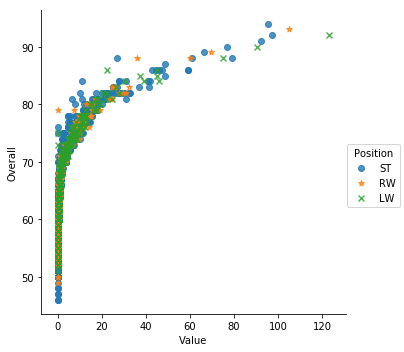

In [4]:
#Another example of visual variable is shape
sns.lmplot(x='Value',y='Overall',markers=['o','*','x'],hue='Position',
          data=footballers[footballers['Position'].isin(['RW','LW','ST'])],fit_reg=False)

# Grouped Boxplot
Suppose we're interested in the following question: do Strikers score higher on "Aggression" than Goalkeepers do?

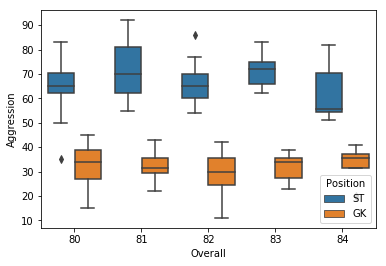

In [5]:
f=footballers.loc[footballers['Position'].isin(['ST','GK'])].loc[:,['Value','Overall','Aggression','Position']]
f=f[(f['Overall'] >= 80)] 
f=f[f['Overall'] < 85]
f['Aggression'] = f['Aggression'].astype(float)
sns.boxplot(y='Aggression',x='Overall',hue='Position',data=f)

Grouping is an extremely communicative visual variable: it makes this chart very easy to interpret. However, it has
very low cardinality: it's very hard to use groups to fit more than a handful of categorical values. In this plot 
we've chosen just two player positions and five Overall player scores and the visualization is already rather 
crowded. Overall, grouping is very similar to faceting in terms of what it can and can't do.

### Summarization

It is difficult to squeeze enough dimensions onto a plot without hurting its interpretability. Very busy plots are 
naturally very hard to interpret. Hence highly multivariate can be difficult to use.

Another way to plot many dataset features while circumnavigating this problem is to use **summarization**. 
Summarization is the creation and addition of new variables by mixing and matching the information provided in the 
old ones.

Summarization is a useful technique in data visualization because it allows us to "boil down" potentially very 
complicated relationships into simpler ones.


## Heatmap

#Probably the most heavily used summarization visualization is the **correlation plot**, in which measures the 
#correlation between every pair of values in a dataset and plots a result in color.

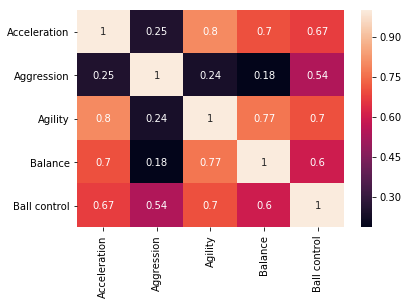

In [6]:
f=footballers.loc[:,['Acceleration','Aggression','Agility','Balance','Ball control']
                 ].applymap(lambda v: int(v) if str.isdecimal(v) else np.nan).dropna().corr()
sns.heatmap(data=f,annot=True)

Each cell in this plot is the intersection of two variables; its color and label together indicate the amount of 
*correlation* between the two variables

In [7]:
f

,Acceleration,Aggression,Agility,Balance,Ball control
Acceleration,1.000000,0.253392,0.799476,0.702341,0.671947
Aggression,0.253392,1.000000,0.236537,0.184877,0.541160
Agility,0.799476,0.236537,1.000000,0.766645,0.701899
Balance,0.702341,0.184877,0.766645,1.000000,0.598220
Ball control,0.671947,0.541160,0.701899,0.598220,1.000000


## Parallel Coordinates

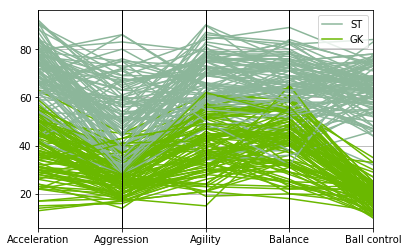

In [8]:
from pandas.plotting import parallel_coordinates
f=footballers.loc[footballers['Position'].isin(['ST','GK'])
                 ].loc[:,['Acceleration','Aggression','Agility','Balance','Ball control']
                      ].applymap(lambda v: int(v) if str.isdecimal(v) else np.nan).dropna()
f['Position']=footballers['Position']
f=f.sample(200)
parallel_coordinates(f,'Position')


In [9]:
pokemon=pd.read_csv("/home/saumitra/Desktop/kaggle/pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


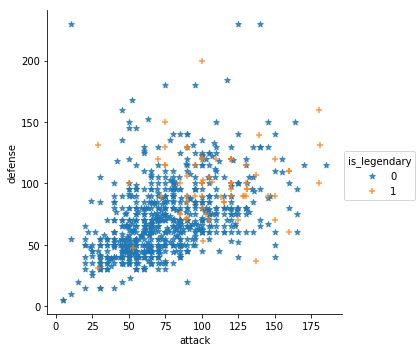

In [10]:
sns.lmplot(x='attack',y='defense',hue='is_legendary',data=pokemon,markers=(['*','+']),fit_reg=False)

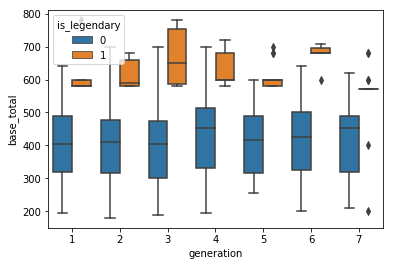

In [11]:
sns.boxplot(x='generation',y='base_total',hue='is_legendary',data=pokemon)

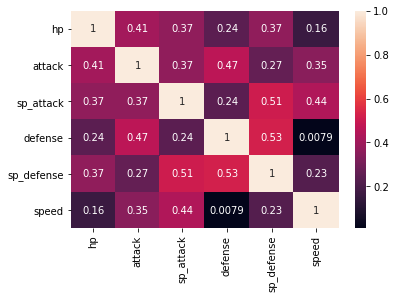

In [12]:
sns.heatmap(pokemon.loc[:,['hp','attack','sp_attack','defense','sp_defense','speed']].corr(),annot=True)


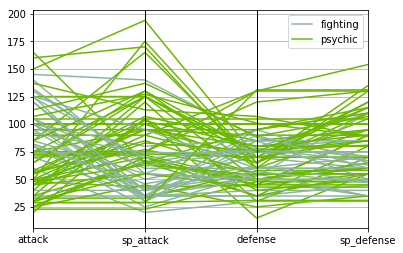

In [13]:
f=pokemon.loc[pokemon['type1'].isin(['fighting','psychic'])].loc[:,['type1','attack','sp_attack','defense','sp_defense']]
parallel_coordinates(f,'type1')

The three techniques we have covered in this tutorial are faceting, using more visual variables, and summarization.

Some examples of visual variables are shape, color, size, x-position, y-position, and grouping. However there are 
many more that are possible!

In data visualization, summarization works by compressing complex data into simpler, easier-to-plot indicators.
